In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
data = pd.read_csv('/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt', sep=';', 
                 parse_dates=[['Date','Time']], infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'])
data.head()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date_Time              datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [4]:
def dataset_info(a):
    print('1) Number of rows in the given dataset: ', a.shape[0])
    print('2) Number of columns in the given dataset: ', a.shape[1])
    lst = []
    for i in a.columns:
        lst.append(i)
        
    print('3) The names of columns are: ',lst)
    for j in lst:
        print('For '+ j + ' : '+ ' '+ 'Upper Limit : ' + str(a[j].max()) + '||' +'Lower : ' + str(a[j].min()))
    
    print('4) Missing Value Calculation:') 
    print(a.isnull().sum())

In [5]:
dataset_info(data)

1) Number of rows in the given dataset:  2075259
2) Number of columns in the given dataset:  8
3) The names of columns are:  ['Date_Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
For Date_Time :  Upper Limit : 2010-11-26 21:02:00||Lower : 2006-12-16 17:24:00
For Global_active_power :  Upper Limit : 11.122||Lower : 0.076
For Global_reactive_power :  Upper Limit : 1.39||Lower : 0.0
For Voltage :  Upper Limit : 254.15||Lower : 223.2
For Global_intensity :  Upper Limit : 48.4||Lower : 0.2
For Sub_metering_1 :  Upper Limit : 88.0||Lower : 0.0
For Sub_metering_2 :  Upper Limit : 80.0||Lower : 0.0
For Sub_metering_3 :  Upper Limit : 31.0||Lower : 0.0
4) Missing Value Calculation:
Date_Time                    0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_mete

In [6]:
data["Global_active_power"].fillna(data["Global_active_power"].mean(),inplace=True)
data["Global_reactive_power"].fillna(data["Global_reactive_power"].mean(),inplace=True)
data["Voltage"].fillna(data["Voltage"].median(),inplace=True)
data["Global_intensity"].fillna(data["Global_intensity"].mean(),inplace=True)
data["Sub_metering_1"].fillna(data["Sub_metering_1"].mean(),inplace=True)
data["Sub_metering_2"].fillna(data["Sub_metering_2"].mean(),inplace=True)
data["Sub_metering_3"].fillna(data["Sub_metering_3"].mean(),inplace=True)

In [7]:
data.isna().sum()

Date_Time                0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

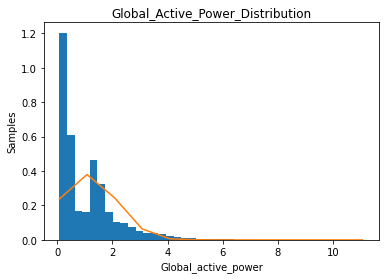

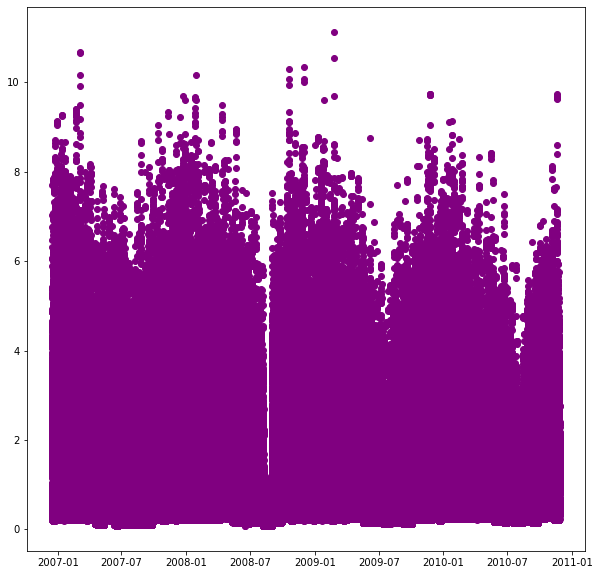

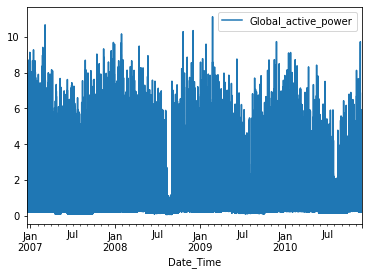

In [8]:
from scipy.stats import norm

# Hist + Bell curve
plt.hist(data.Global_active_power, bins = 40,density=True)
plt.title('Global_Active_Power_Distribution')
plt.xlabel('Global_active_power')
plt.ylabel('Samples')

rng = np.arange(data.Global_active_power.min(), data.Global_active_power.max())
plt.plot(rng, norm.pdf(rng, data.Global_active_power.mean(),data.Global_active_power.std()))

# Target Variable graphs
fig,ax = plt.subplots(figsize=(5,5))

ax.scatter(data['Date_Time'].values,data['Global_active_power'],color = 'purple')
plt.show()

# Datetime line Plot
data.plot(x='Date_Time',y='Global_active_power')

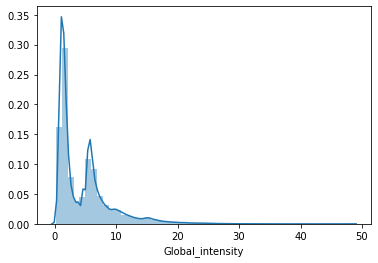

In [33]:
#sns.distplot(data['Global_active_power'])
sns.distplot(data['Global_intensity'])

In [38]:
viz_data = data.drop('Date_Time',axis=1)
viz_data = pd.get_dummies(viz_data)

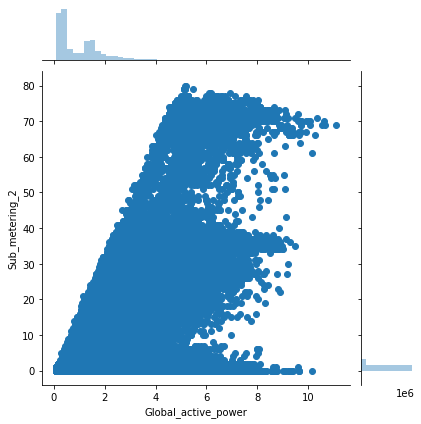

In [42]:
sns.jointplot(x="Global_active_power", y="Sub_metering_2", data= viz_data)

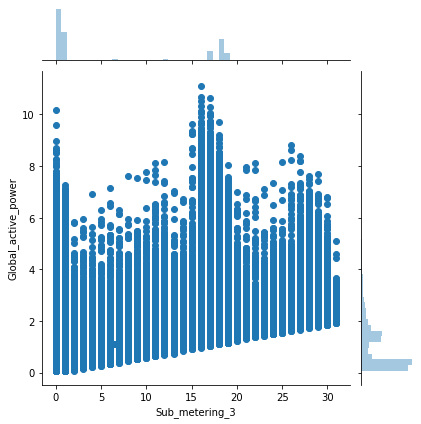

In [44]:
sns.jointplot(y="Global_active_power", x="Sub_metering_3", data= viz_data)

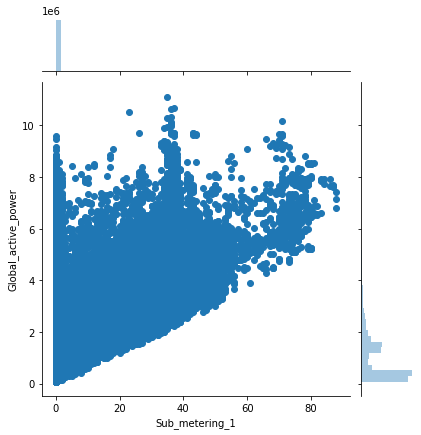

In [45]:
sns.jointplot(y="Global_active_power", x="Sub_metering_1", data= viz_data)

In [52]:
data['year'] = pd.DatetimeIndex(data['Date_Time']).year
data['month'] = pd.DatetimeIndex(data['Date_Time']).month
data['day'] = pd.DatetimeIndex(data['Date_Time']).day
data['hour'] = pd.DatetimeIndex(data['Date_Time']).hour
data['minutes'] = pd.DatetimeIndex(data['Date_Time']).minute
data = data.drop('Date_Time',axis=1)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,hour,minutes
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,24
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,25
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,26
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,27
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,28


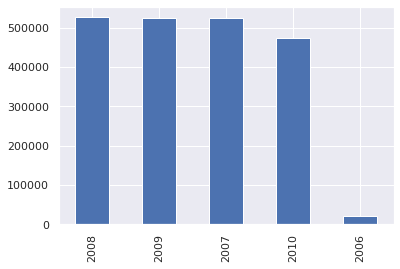

In [53]:
c = data['year'].value_counts()
sns.set()
c.plot(kind='bar')

Global_active_power distribution in comparison with years

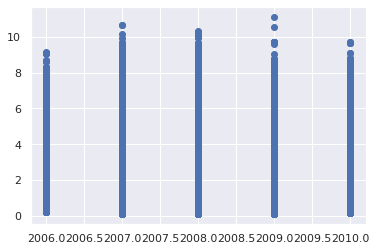

In [56]:
plt.scatter(data['year'],data['Global_active_power'])
plt.show()

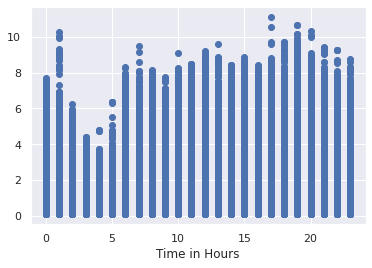

In [57]:
plt.scatter(data['hour'],data['Global_active_power'])
plt.xlabel('Time in Hours')
plt.show()

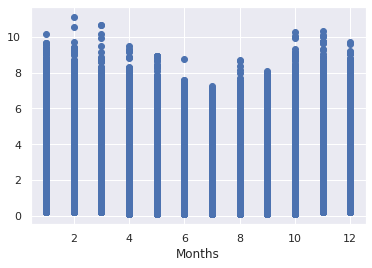

In [58]:
plt.scatter(data['month'],data['Global_active_power'])
plt.xlabel('Months')
plt.show()